In [1]:
#Loading the required libraries

import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Bank.csv",header=0)

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']:

    data[col] = data[col].astype('category')

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
categorical_Attributes = data.select_dtypes(include=['category']).columns
categorical_Attributes

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [8]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_", drop_first=True)
print (data.columns, data.shape)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object') (4521, 43)


In [9]:
#Split the data in to train and test

X, y = data.loc[:,data.columns!='y_yes'].values, data.loc[:,'y_yes'].values

print(type(X))

#num_array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

<class 'numpy.ndarray'>


In [10]:
X_train

array([[  32,  101,   19, ...,    0,    0,    1],
       [  44, 3762,   28, ...,    0,    0,    1],
       [  54, 4503,   21, ...,    0,    0,    1],
       ...,
       [  34, 1499,   13, ...,    0,    0,    0],
       [  59,  174,   16, ...,    0,    0,    1],
       [  36,    0,   27, ...,    0,    0,    1]], dtype=int64)

In [11]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    2992
1     398
dtype: int64
0    1008
1     123
dtype: int64


In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(228.16908703819203, 213.55714285714285, 'X[3] <= 387.5\ngini = 0.207\nsamples = 3390\nvalue = [2992, 398]'),
 Text(168.92902900390777, 205.79142857142858, 'X[40] <= 0.5\ngini = 0.122\nsamples = 2720\nvalue = [2543, 177]'),
 Text(147.27465680983423, 198.0257142857143, 'X[37] <= 0.5\ngini = 0.093\nsamples = 2647\nvalue = [2517, 130]'),
 Text(121.81994735494914, 190.26, 'X[34] <= 0.5\ngini = 0.082\nsamples = 2602\nvalue = [2490, 112]'),
 Text(87.08022046020878, 182.4942857142857, 'X[3] <= 222.5\ngini = 0.075\nsamples = 2572\nvalue = [2472, 100]'),
 Text(34.38230776486865, 174.72857142857143, 'X[0] <= 70.5\ngini = 0.039\nsamples = 1904\nvalue = [1866, 38]'),
 Text(15.6393871743676, 166.96285714285713, 'X[0] <= 19.5\ngini = 0.036\nsamples = 1894\nvalue = [1859, 35]'),
 Text(2.694948669171632, 159.19714285714286, 'X[32] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(1.347474334585816, 151.43142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(4.042423003757448, 151

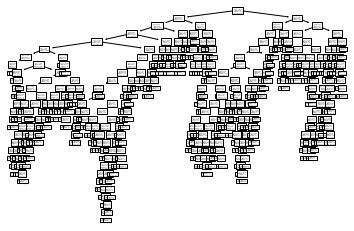

In [13]:
#Once trained, you can plot the tree with the plot_tree function

tree.plot_tree(clf)

In [14]:
clf.feature_importances_

array([0.06870643, 0.10975582, 0.10210286, 0.24796706, 0.04146667,
       0.05074318, 0.01321581, 0.00917298, 0.00490549, 0.00455486,
       0.0083121 , 0.01138691, 0.00512612, 0.00869481, 0.00443963,
       0.01498514, 0.00443737, 0.        , 0.01610804, 0.00142339,
       0.0140154 , 0.01389341, 0.        , 0.00282606, 0.00447352,
       0.00534012, 0.00542626, 0.01541465, 0.0157096 , 0.        ,
       0.01528928, 0.0026278 , 0.00441252, 0.02039092, 0.01100886,
       0.00589785, 0.01615715, 0.02748734, 0.0053095 , 0.        ,
       0.08539169, 0.00142339])

In [17]:
#Finding the importance of each feature
clf.feature_importances_
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,duration,balance,day,poutcome_success,age,pdays,campaign,month_oct,month_jun,month_nov,...,job_unemployed,month_jul,default_yes,month_jan,marital_single,poutcome_unknown,job_unknown,month_dec,education_unknown,poutcome_other
1,0.247967,0.109756,0.102103,0.0853917,0.0687064,0.0507432,0.0414667,0.0274873,0.0203909,0.0161571,...,0.00443737,0.00441252,0.00282606,0.0026278,0.00142339,0.00142339,0,0,0,0


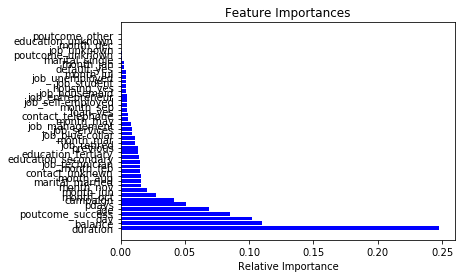

In [18]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [20]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [21]:
test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [22]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[2992    0]
 [   0  398]]
[[944  64]
 [ 66  57]]


In [23]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [24]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9365079365079365
Test TPR:  0.4634146341463415
Test Accuracy:  0.8850574712643678


In [25]:
#Building Decision Tree Model using Variable Importance
select = indices[0:10]
clf = tree.DecisionTreeClassifier(max_depth=25)
clf = clf.fit(X_train[:,select], y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train[:,select])
test_pred = clf.predict(X_test[:,select])

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

[[2992    0]
 [   0  398]]
[[932  76]
 [ 71  52]]
Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0
Test TNR:  0.9246031746031746
Test TPR:  0.42276422764227645
Test Accuracy:  0.870026525198939


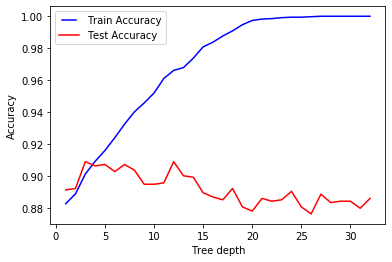

In [26]:
#How do we arrive at the best tree depth for this data?
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [27]:
#Building Decision Tree Model using Variable Importance
select = indices[0:10]
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train[:,select], y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train[:,select])
test_pred = clf.predict(X_test[:,select])

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

[[2904   88]
 [ 258  140]]
[[970  38]
 [ 76  47]]
Train TNR:  0.9705882352941176
Train TPR:  0.35175879396984927
Train Accuracy:  0.8979351032448377
Test TNR:  0.9623015873015873
Test TPR:  0.3821138211382114
Test Accuracy:  0.8992042440318302


In [28]:
#Building Decision Tree Model using Variable Importance
select = indices[0:10]
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train[:,select], y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train[:,select])
test_pred = clf.predict(X_test[:,select])

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

[[2903   89]
 [ 222  176]]
[[965  43]
 [ 68  55]]
Train TNR:  0.9702540106951871
Train TPR:  0.44221105527638194
Train Accuracy:  0.908259587020649
Test TNR:  0.9573412698412699
Test TPR:  0.44715447154471544
Test Accuracy:  0.9018567639257294


In [29]:
#set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

#Use the GridSearchCV
dt = tree.DecisionTreeClassifier() #estimator
clf2 = GridSearchCV(dt, param_grid, cv=3)
clf2.fit(X_train, y_train)
clf2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
#Predicting on Train and Test
train_pred = clf2.predict(X_train)
test_pred = clf2.predict(X_test)

In [31]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.9756016042780749
Train TPR:  0.3944723618090452
Train Accuracy:  0.9073746312684365
Test TNR:  0.9702380952380952
Test TPR:  0.37398373983739835
Test Accuracy:  0.905393457117595


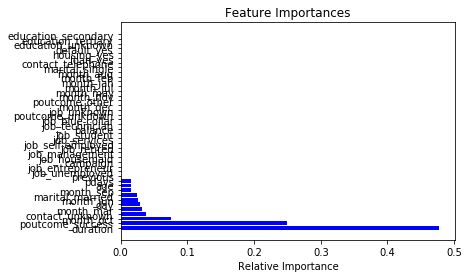

In [32]:
#Finding the importance of each feature
clf2.best_estimator_.feature_importances_
features = data.columns
importances = clf2.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])

#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

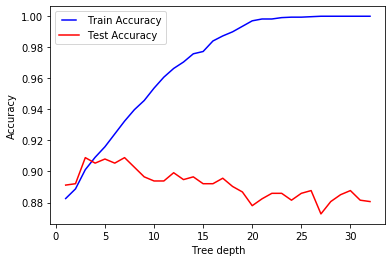

In [33]:
#How do we arrive at the best tree depth for this data?
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

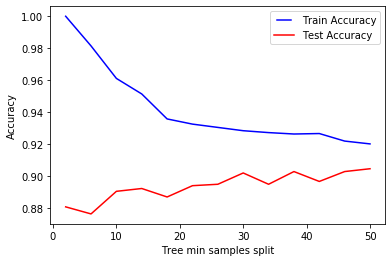

In [34]:
#How do we arrive at the best tree min samples split for this data?
#min_samples_splits = np.linspace(2, 31, 30, endpoint=True)

min_samples_splits=[2,6,10,14,18,22,26,30,34,38,42,46,50]

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_splits, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

In [35]:
#Predicting on Train and Test
train_pred = clf2.predict(X_train)
test_pred = clf2.predict(X_test)

In [36]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [37]:
#Visualizing Decision Trees
#Install the libraries
!conda install --yes python-graphviz
!conda install --yes graphviz

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [38]:
#Render the model
dot_data = tree.export_graphviz(clf2.best_estimator_, out_file=None, 
                                feature_names=data.drop(['y_yes'], axis = 1).columns,
                                class_names=['No','Yes'], 
                                filled=True, rounded=True, special_characters=True) 

In [39]:
import graphviz

In [40]:
graph = graphviz.Source(dot_data) 
graph
graph.render("Subscription_term_deposit")

'Subscription_term_deposit.pdf'